In [3]:
%pip install nltk wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Loading the dataset
file_path = 'yelp.csv'
data = pd.read_csv(file_path)



In [2]:
#first few rows
print(data.head())

# Basic info
print(data.info())


              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    

In [3]:
# Map stars to sentiments: positive, neutral, negative
data['sentiment'] = data['stars'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Check the distribution
print(data['sentiment'].value_counts())


sentiment
positive    6863
negative    1676
neutral     1461
Name: count, dtype: int64


In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download resources
nltk.download('punkt')
nltk.download('stopwords')

# Define a text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply text cleaning
data['cleaned_text'] = data['text'].apply(clean_text)

# Preview cleaned text
print(data[['text', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to C:\Users\krishna
[nltk_data]     rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\krishna
[nltk_data]     rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  My wife took me here on my birthday for breakf...   
1  I have no idea why some people give bad review...   
2  love the gyro plate. Rice is so good and I als...   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...   
4  General Manager Scott Petello is a good egg!!!...   

                                        cleaned_text  
0  wife took birthday breakfast excellent weather...  
1  idea people give bad reviews place goes show p...  
2  love gyro plate rice good also dig candy selec...  
3  rosie dakota love chaparral dog park convenien...  
4  general manager scott petello good egg go deta...  


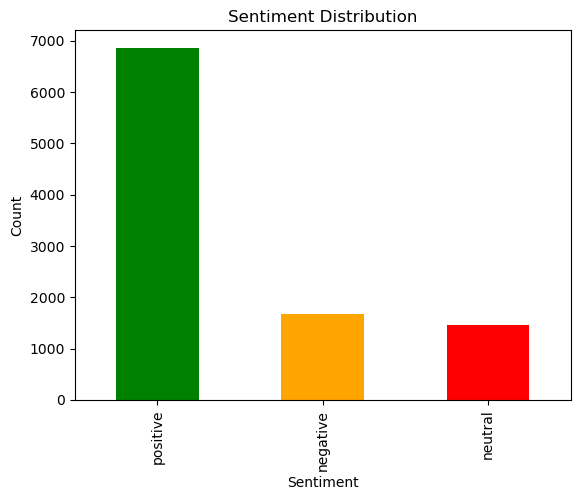

In [5]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


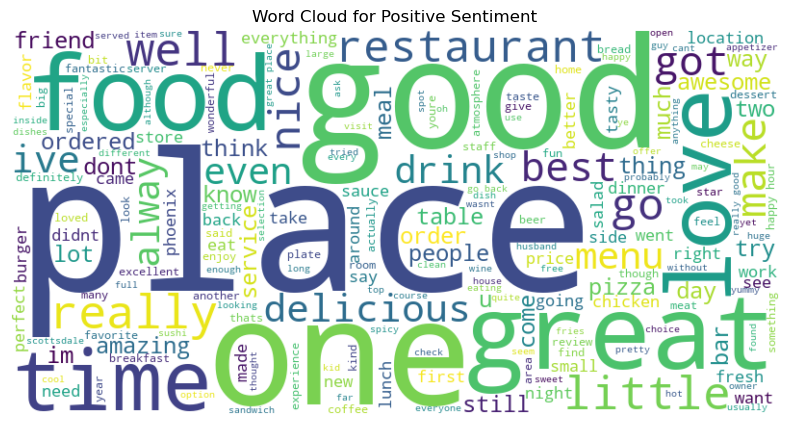

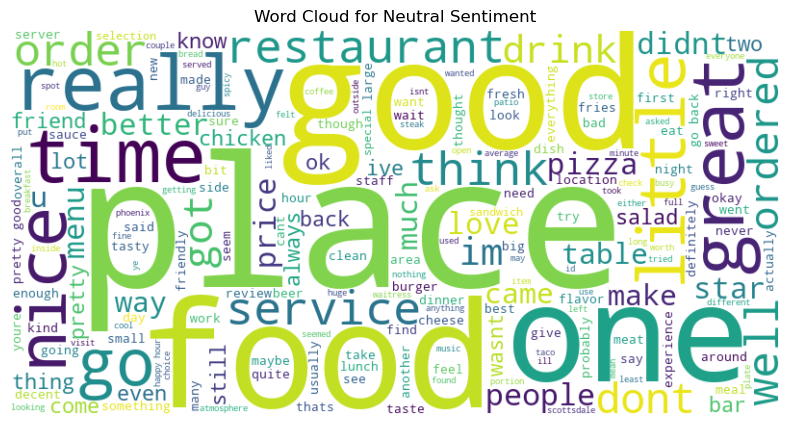

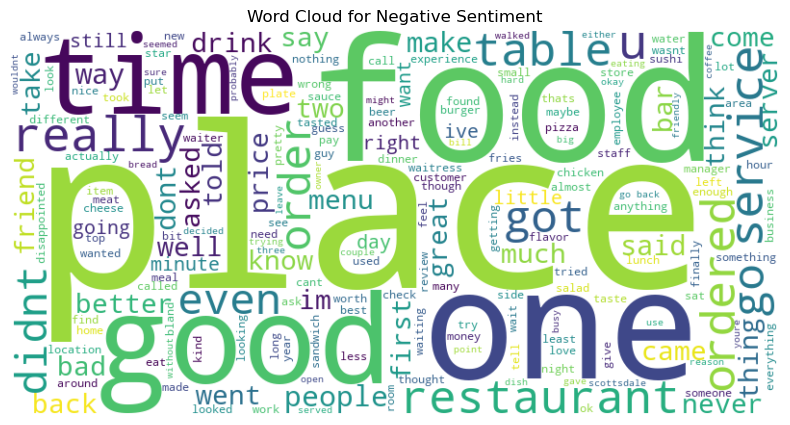

In [6]:
from wordcloud import WordCloud

# Generate and display word clouds for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    text = ' '.join(data[data['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform cleaned text
X = vectorizer.fit_transform(data['cleaned_text']).toarray()

# Target variable (sentiment)
y = data['sentiment']


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7905
Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.54      0.64       308
     neutral       0.50      0.19      0.28       289
    positive       0.81      0.97      0.88      1403

    accuracy                           0.79      2000
   macro avg       0.70      0.57      0.60      2000
weighted avg       0.76      0.79      0.76      2000

